<a href="https://colab.research.google.com/github/Sambaran04/Tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [63]:
# Import TenforFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [64]:
import numpy as np
import matplotlib.pyplot as plt

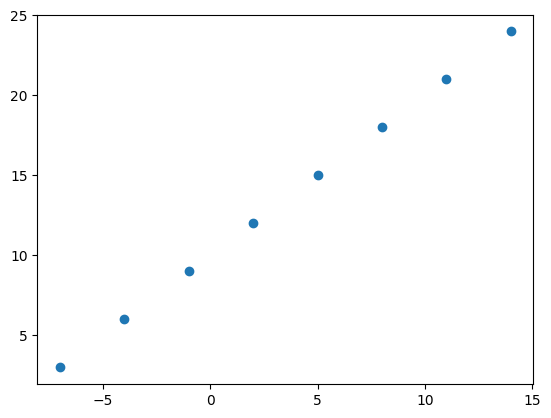

In [65]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualize it
plt.scatter(X, y)

In [66]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [67]:
# Create a debo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [68]:
X[0].shape, y[0].shape

((), ())

In [69]:
X = tf.constant(X)
y = tf.constant(y)

In [70]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

## Steps in modelling with TensorFlow

1. **Creating a model**- define the inpur and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model**- letting the model try to find patterns between X & y (features and labels).

In [71]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 341ms/step - loss: 15.2165 - mae: 15.2165
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 14.9531 - mae: 14.9531
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.8206 - mae: 14.8206
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 14.6881 - mae: 14.6881
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.5556 - mae: 14.5556


In [72]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[-4.666898]], dtype=float32)

## Improving our Model

In [73]:
# Let's rebuild our model

# tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=1000, verbose=0)

In [74]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [75]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 82ms/step


array([[28.035551]], dtype=float32)

In [76]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=1000, verbose=0)

In [77]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[26.9268]], dtype=float32)

## Evaluating the model

In practice, a typical workflow you'll go through when builidng neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> twea a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words we should memorize:

> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [78]:
# Make a bigger dataset:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [79]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

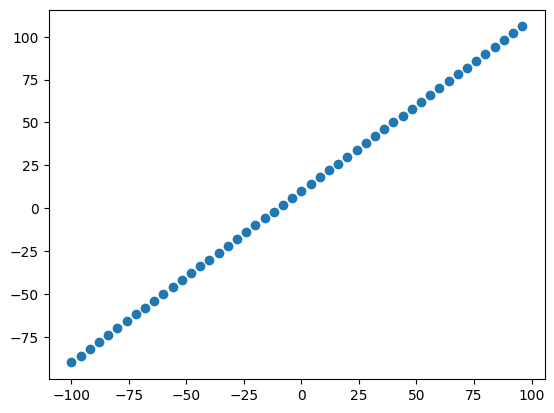

In [80]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### There are 3 Sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - The model gets tuned on this data, which is typcically 10-15% of the data available.
* Test set - The model gets evaluated on this data to test what it has learnt, this set is typically 10-15% of the data available.

In [81]:
# Check the length of how many samples we have
len(X)

50

In [82]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

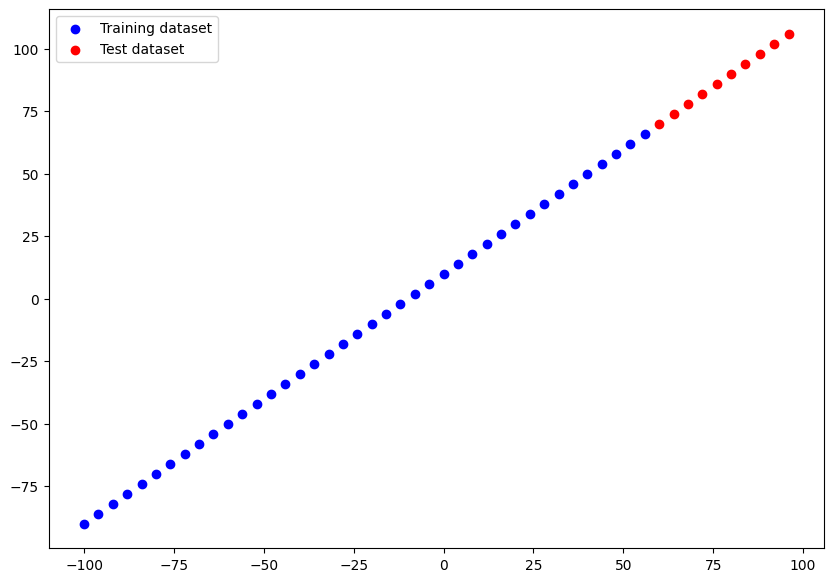

In [83]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training dataset")
# Plot test data in green
plt.scatter(X_test, y_test, c="r", label = "Test dataset")
plt.legend()

In [84]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [85]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [86]:
y_test_fine = np.array(y_test)
y_test_fine

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

In [87]:
y_pred

array([[ 69.717384],
       [ 73.69798 ],
       [ 77.67856 ],
       [ 81.65915 ],
       [ 85.63973 ],
       [ 89.62032 ],
       [ 93.60091 ],
       [ 97.58151 ],
       [101.562096],
       [105.54268 ]], dtype=float32)

In [88]:
'''
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
'''

'\n# Let\'s create a model which builds automatically by defining the input_shape argument in the first layer\ntf.random.set_seed(42)\n\n# Create a model (same as above)\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),\n    tf.keras.layers.Dense(1, name="output_layer")\n], name="model_1")\n\n# 2. Compile the model\nmodel.compile(loss="mae",\n              optimizer = tf.keras.optimizers.SGD(),\n              metrics = ["mae"])\n'

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 1)                 0         
                                                                 
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (pattern) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during trainting (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

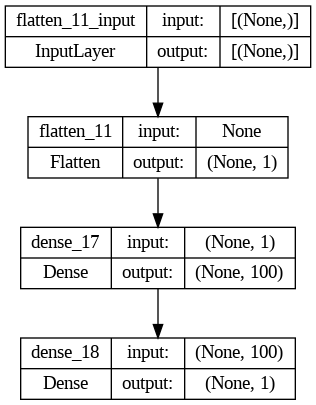

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

often we'll see this in the form of `y_test` or `y_true` versus `y_pred`  (ground truth versus your model's predictions)

In [91]:
y_pred

array([[ 69.717384],
       [ 73.69798 ],
       [ 77.67856 ],
       [ 81.65915 ],
       [ 85.63973 ],
       [ 89.62032 ],
       [ 93.60091 ],
       [ 97.58151 ],
       [101.562096],
       [105.54268 ]], dtype=float32)

In [92]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [93]:
# Let's create a plotting function
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  '''
  Plots training data, test data and compares predictions to ground truth labels.
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c ='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend()

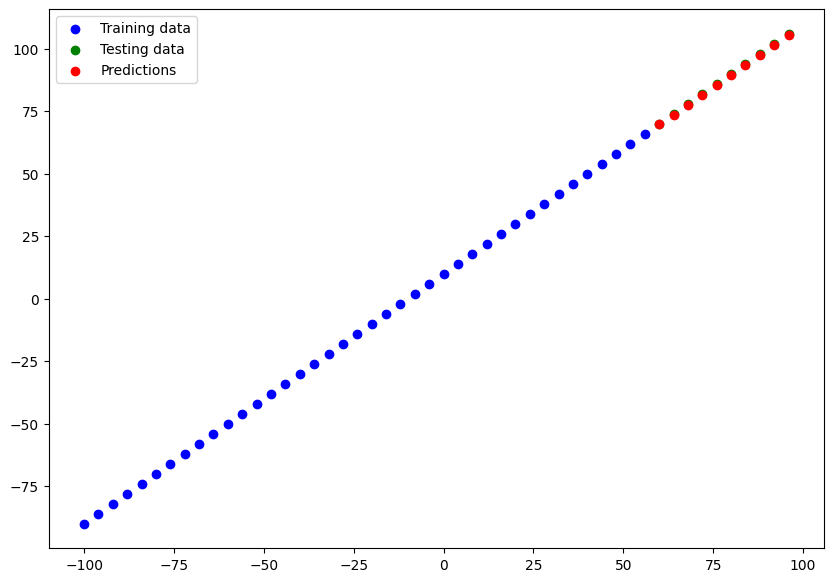

In [94]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE- Mean Absolute Error, "on average, how wrong is each of my model's predictions"

* MSE- Mean Square Error, "Square the average errors"

In [95]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.36996764>

In [96]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.13998477>

In [97]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more Opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1`- same as the original model, 1 layer, trained for 100 epochs.
2. `model_2`- 2 layers, trained for 100 epochs
3. `model_3`- 2 layers, trained for 500 epochs

**Build** `model_1`

In [98]:
# Make a bigger dataset:
X = tf.range(-100, 100, 4)

# Make labels for the dataset
y = X+10

In [99]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]


In [100]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 43ms/step


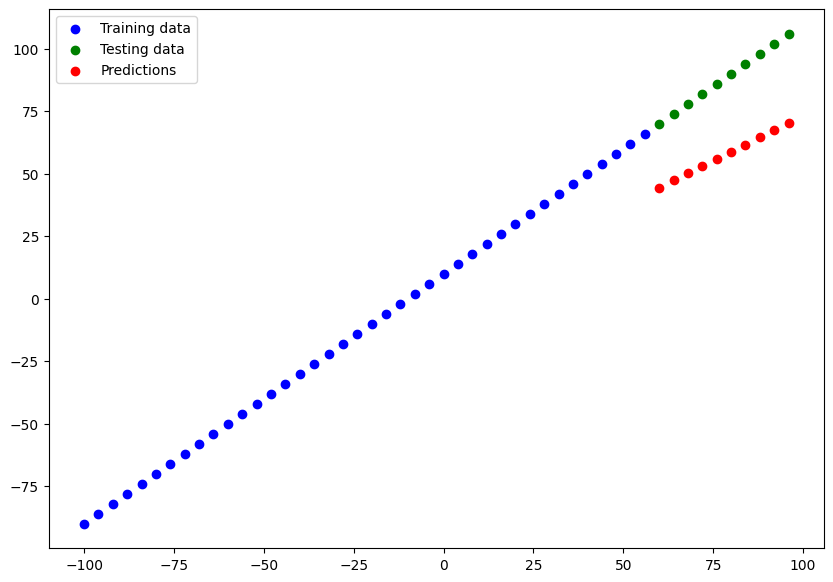

In [101]:
# Make and Plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1)

In [102]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test, y_pred_1)
mse_1=mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.625937>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.39435>)

**Build `model_2`**

* 2 Dense layers, trained for 100 epochs

In [103]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 49ms/step


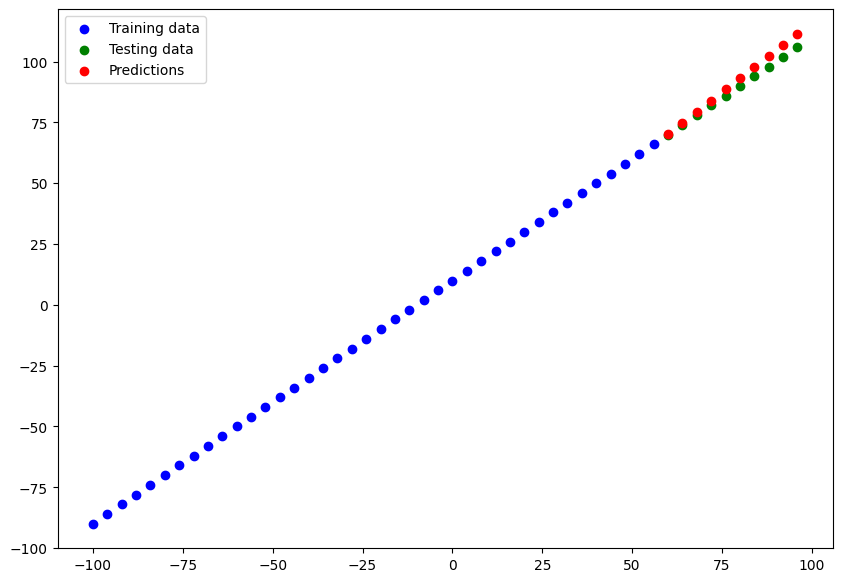

In [104]:
# Make and Plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [105]:
# Calculate model_2 evaluation metrics
mae_2=mae(y_test, y_pred_2)
mse_2=mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.886657>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.0431185>)

**Build `model_3`**

* 2 Dense layers, trained for 500 epochs

In [106]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 93ms/step


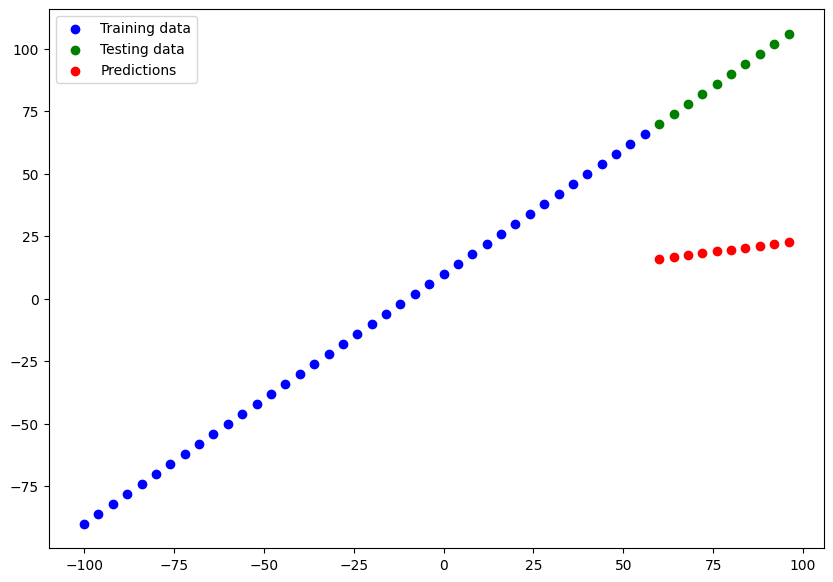

In [107]:
# Make and Plot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

In [108]:
# Calculate model_3 evaluation metrics
mae_3=mae(y_test, y_pred_3)
mse_3=mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.70397>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.7114>)

### Comparing the results of our experiments
 We've run a few experiments, let's compare the results.

In [109]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.625937,948.394348
1,model_2,2.886657,11.043118
2,model_3,68.703972,4806.711426


In [110]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 1)                 0         
                                                                 
 dense_20 (Dense)            (None, 100)               200       
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking my experimens

One really good habit in machine learning modelling is to track the results of my experiments.

And when doing so, it can be tedious if i'm running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard- a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases- a tool for tracking all of kinds of machine Learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web applications or a mobile app.

There are two main formats we can save our model's too:
  1. The SavedModel format
  2. The HDF5 format

In [111]:
# Save model using the SavedModel format
"""model_2.save("Best_model_SavedModel_format")"""

'model_2.save("Best_model_SavedModel_format")'

In [112]:
# Save model using the HDF5 format
"""model_2.save("Best_model_HDF5.h5")"""

'model_2.save("Best_model_HDF5.h5")'

## Loading a saved model

In [113]:
# Load in the SavedModel format model
"""loaded_SavedModel_format= tf.keras.models.load_model("/content/Best_model_SavedModel_format")
loaded_SavedModel_format.summary()"""

'loaded_SavedModel_format= tf.keras.models.load_model("/content/Best_model_SavedModel_format")\nloaded_SavedModel_format.summary()'

In [114]:
# Load in the HDF5 format model
"""loaded_HDF5_format= tf.keras.models.load_model("/content/Best_model_HDF5.h5")
loaded_HDF5_format.summary()"""

'loaded_HDF5_format= tf.keras.models.load_model("/content/Best_model_HDF5.h5")\nloaded_HDF5_format.summary()'

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
  1. You can go to the "files" tab and right click on the file you're after and click "download".
  2. Use code
  3. Save it to Google Drive

In [115]:
# Download a file from Google Colab
# from google.colab import files
# files.download("/content/Best_model_HDF5.h5")

In [116]:
from google.colab import drive
# drive.mount('/content/drive')

In [117]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp <PATH> <New_PATH>

## A Larger Example

In [118]:
# Import the Required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
# Read in the insurance dataset
insurance= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [120]:
# Let's try one_hot encoding our DataFrame so it's all numbers
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [121]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [122]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Build a neural Network (sort of like model_2)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=1000, verbose=0)

### Let's Improve our model

In [124]:
# Build a neural Network (sort of like model_2)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(250),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
history= insurance_model_1.fit(X_train, y_train, epochs=250, verbose=0)

In [125]:
# Evaluate the larger model
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3261.1091 - mae: 3261.1091


[3261.109130859375, 3261.109130859375]

Text(0.5, 0, 'Epochs')

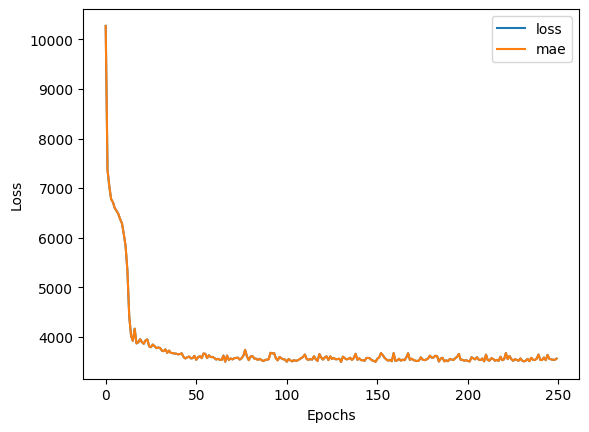

In [126]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")